<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/Task/Task_0531_choi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task1_0531. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요. (전처리 필요)

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/m_3_datas/auto-mpg.csv'
df = pd.read_csv(file_path)
df.set_index('car name',inplace=True)
print(df.head())

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 28.0+ KB


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [ ]:
print(df)

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   
...                         ...        ...           ...        ...     ...   
ford mustang gl            27.0          4         140.0         86    2790   
vw pickup                  44.0          4          97.0         52    2130   
dodge rampage              32.0          4         135.0         84    2295   
ford ranger                28.0          4         120.0         79    2625   
chevy s-10                 31.0          4         1

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
import pandas as pd
import numpy as np

# DataFrame을 순회하면서 숫자가 아닌 값을 출력
for index, row in df.iterrows():
    for column in df.columns:
        try:
            pd.to_numeric(row[column])
        except ValueError:
            print(f"인덱스 {index}의 {column} 컬럼에는 숫자가 아닌 값이 있습니다: {row[column]}")

## 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()


인덱스 ford pinto의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 ford maverick의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 renault lecar deluxe의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 ford mustang cobra의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 renault 18i의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?
인덱스 amc concord dl의 horsepower 컬럼에는 숫자가 아닌 값이 있습니다: ?


In [ ]:
## 결측값 처리
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

In [ ]:
df.loc['ford pinto']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
ford pinto,19.0,4,122.0,85.0,2310,18.5,73,1
ford pinto,26.0,4,122.0,80.0,2451,16.5,74,1
ford pinto,23.0,4,140.0,83.0,2639,17.0,75,1
ford pinto,18.0,6,171.0,97.0,2984,14.5,75,1
ford pinto,26.5,4,140.0,72.0,2565,13.6,76,1


In [ ]:
df.info()
#### 결측치 drop에 따라 398 ==> 392 entries

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 35.7+ KB


In [ ]:
df_cor=df.corr()
df_sorted=df_cor.abs().sort_values(by='mpg', ascending=False)
print(df_sorted)
df_sorted=df_cor.sort_values(by='mpg', ascending=False)
df_sorted

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000   0.777618      0.805127    0.778427  0.832244   
weight        0.832244   0.897527      0.932994    0.864538  1.000000   
displacement  0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower    0.778427   0.842983      0.897257    1.000000  0.864538   
cylinders     0.777618   1.000000      0.950823    0.842983  0.897527   
model year    0.580541   0.345647      0.369855    0.416361  0.309120   
origin        0.565209   0.568932      0.614535    0.455171  0.585005   
acceleration  0.423329   0.504683      0.543800    0.689196  0.416839   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
weight            0.416839    0.309120  0.585005  
displacement      0.543800    0.369855  0.614535  
horsepower        0.689196    0.416361  0.455171  
cylinders         0.504683    0.345647  0.568932  
model year        0.290316    1.0000

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005


<Figure size 1200x1200 with 0 Axes>

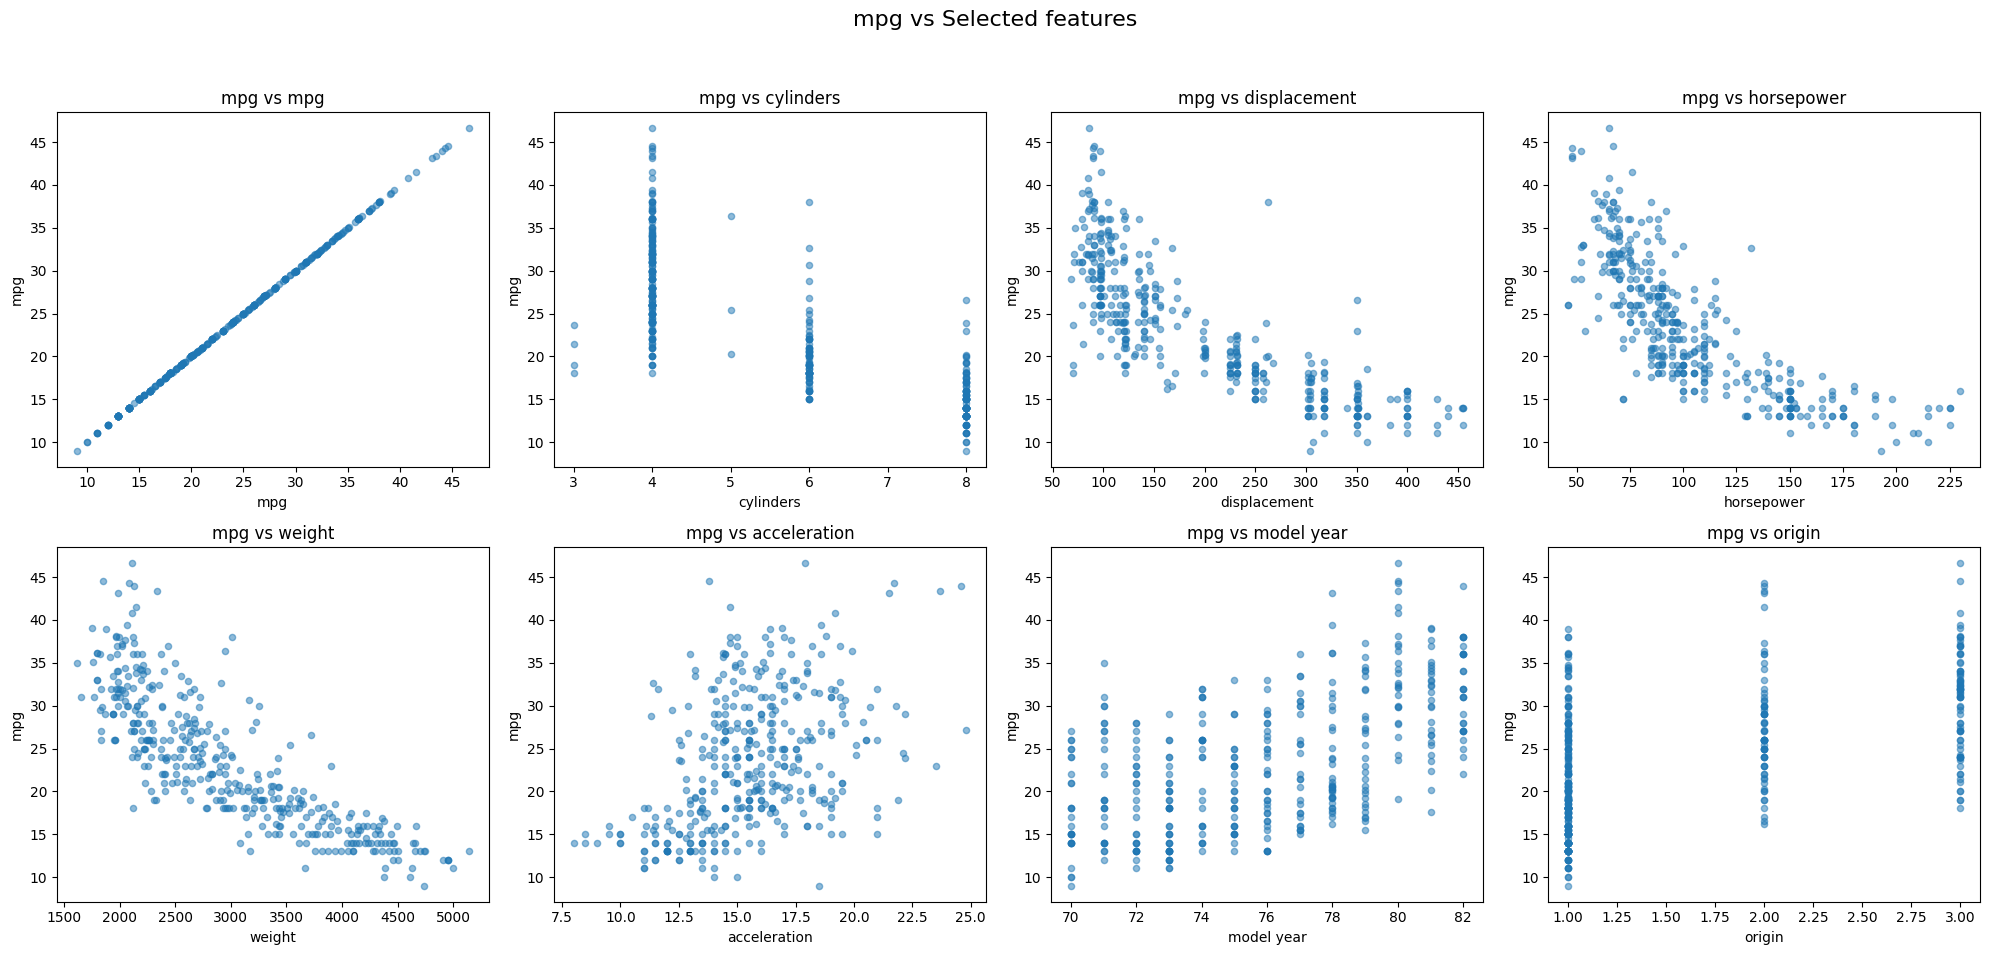

In [ ]:
import matplotlib.pyplot as plt

# DF 열수
num_columns=len(df.columns)
# 그래프 크기 결정
plt.figure(figsize=(12,12))
columns=df.columns
target='mpg'
nocols=4
fig, axes=plt.subplots(nrows=2, ncols=nocols, figsize=(20, 10))
for i, col in enumerate(columns):
  row,col_idx = divmod(i,nocols)
  df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row,col_idx].set_title(f"{target} vs {col}")
fig.suptitle(f'{target} vs Selected features', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show()


In [ ]:
df["mpmy"]=df.groupby("model year")["mpg"].transform(lambda x: round(x.mean(),2))
df["mpog"]=df.groupby("origin")["mpg"].transform(lambda x: round(x.mean(),2))


In [ ]:
df_cor=df.corr()

target_variable='mpg'
correlation_threshold=0.5
print(df_cor[target_variable])
print(df_cor[target_variable][abs(df_cor[target_variable]) > correlation_threshold])
corr_features=df_cor[target_variable][abs(df_cor[target_variable]) > correlation_threshold].index.tolist()

print(corr_features)

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
mpmy            0.655556
mpog            0.576063
Name: mpg, dtype: float64
mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
model year      0.580541
origin          0.565209
mpmy            0.655556
mpog            0.576063
Name: mpg, dtype: float64
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin', 'mpmy', 'mpog']


## Correlation
 - MPG (miles per gallon)에 가장 sensitivity가 높은 parameter:
  - weight,displacement,horsepower,cylinders,model year, origion,acceleration 순

## Normalization
 - Norm이 필요한 params: wt, cyl, disp, hp, drat, carb, gear, qsec
 - Norm이 필요 없는 params: vs, am

## Outlier 가 필요한 params: Outlier 필요성 보임


## Parameter 선정
 - Correlation Coeff.가 0.5 미만 drop ==> drop  am, carb, gear, qsec
 - MPG에 strong correlation을 가지지만 다른 독립변수와 nearly 1:1 종속되어 있는 params: cyl vs. disp. ==>  상대적으로 corr이 높은 cyl 선택

SelectedParams=['mpg','cyl','hp','drat','wt','vs']  

## 파생 변수 발굴
 - Power to weight ratio: (hp/wt)
 - 엔진 크기 대비 실린더 수: (cyl/disp)


## 최종 parameters:
 - Norm 필요: 'mpg','cyl','hp','drat','wt','ppw', 'cyl/disp'
 - Norm 불필요: 'vs'

In [ ]:
print(f"{target_variable}: {corr_features}")

mpg: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin', 'mpmy', 'mpog']


In [ ]:
from sklearn.preprocessing import StandardScaler

correlated_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'mpmy']

# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'


# 'ppw' 파생 변수 추가 (Power to weight ratio)
analysis_df['ppw'] = df['horsepower'] / df['weight']

# 'cpd' 파생 변수 추가 (Cylinders per displacement)
analysis_df['cpd'] = df['cylinders'] / df['displacement']

# 'mpgr' 파생 변수 추가 (Miles per gallon per gear)
analysis_df['apw'] = df['acceleration'] / df['weight']


# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

                            mpg  cylinders  displacement  horsepower  weight  \
car name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                            mpmy       ppw       cpd       apw  
car name                                                        
chevrolet chevelle malibu  17.69  0.037100  0.026059  0.003425  
buick skylark 320          17.69  0.044679  0.022857  0.003114  
plymouth satellite         17.69  0.043655  0.025157  0.003201  
amc rebel sst              17.69  0.043694  0.026316  0.003495  
ford torino                17.69  0.040591  0.026

<ipython-input-17-5be84f4cc4e6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['ppw'] = df['horsepower'] / df['weight']
<ipython-input-17-5be84f4cc4e6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['cpd'] = df['cylinders'] / df['displacement']
<ipython-input-17-5be84f4cc4e6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<Figure size 1200x1200 with 0 Axes>

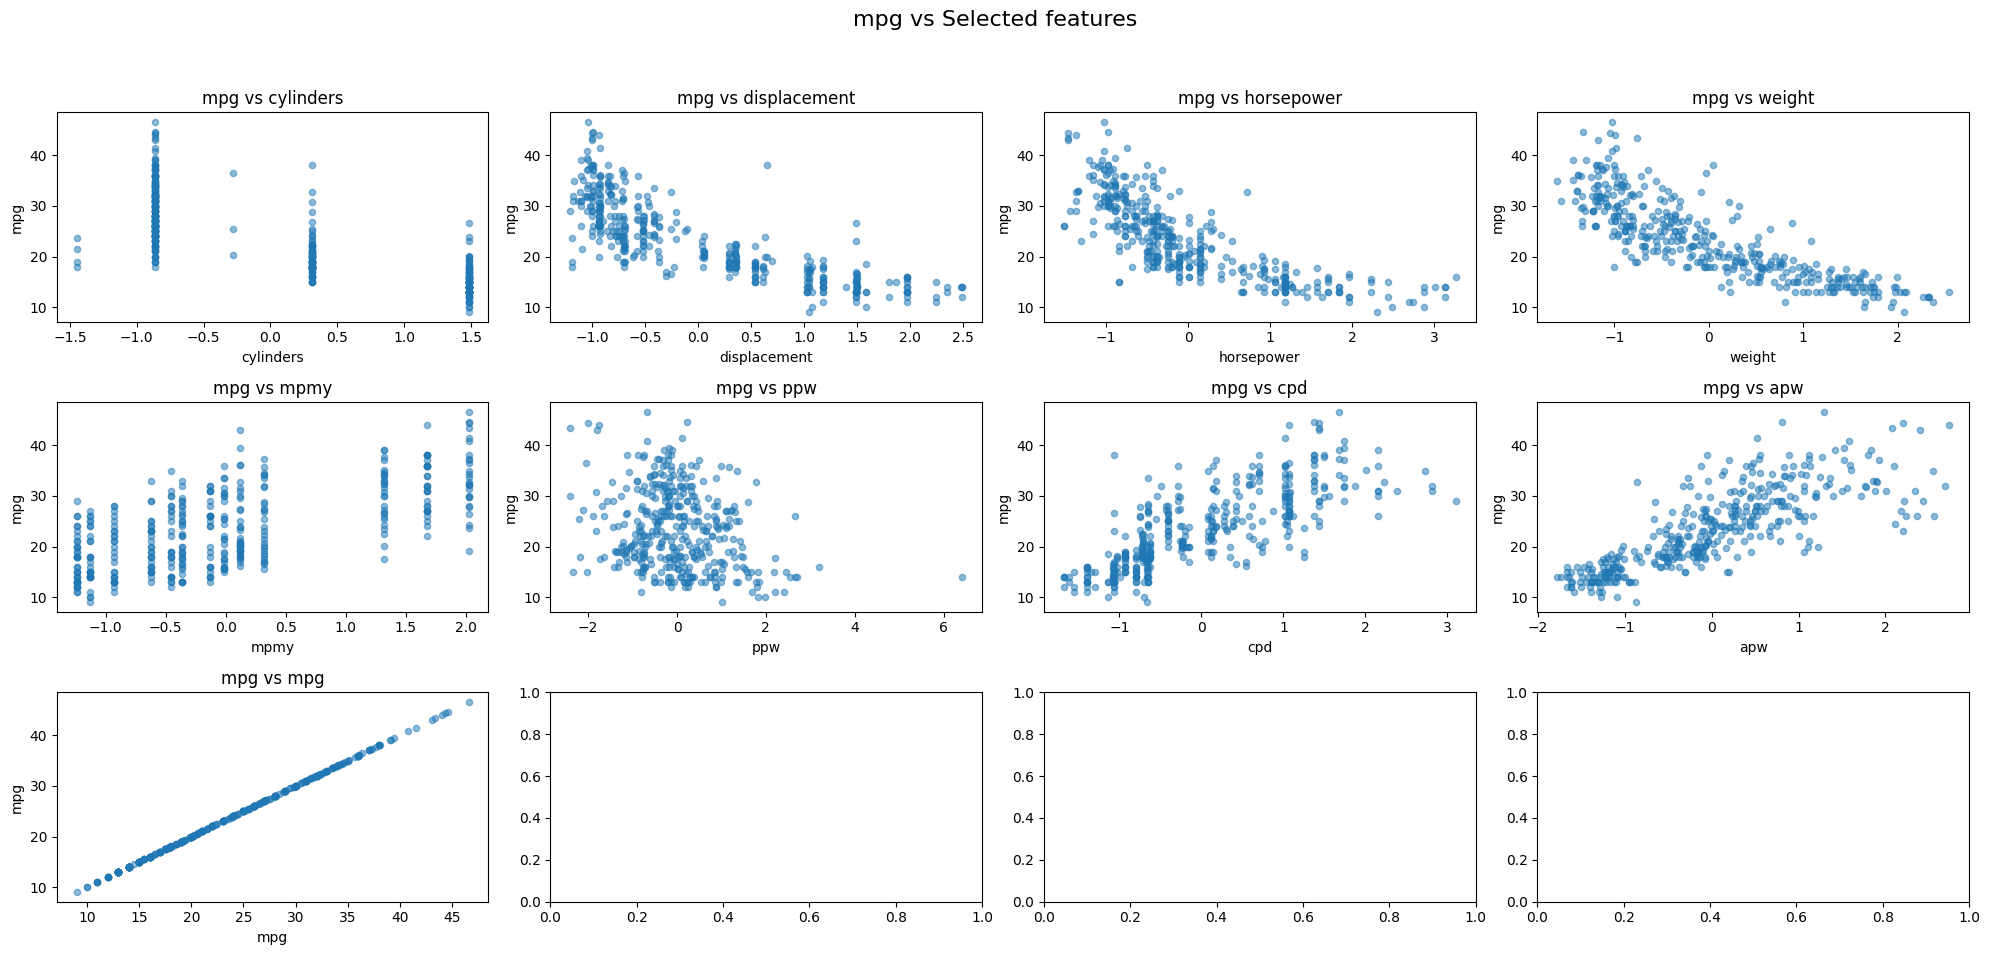

In [ ]:
import matplotlib.pyplot as plt

# DF 열수
num_columns=len(scaled_df.columns)
# 그래프 크기 결정
plt.figure(figsize=(12,12))
columns=scaled_df.columns
target='mpg'
nocols=4
fig, axes=plt.subplots(nrows=3, ncols=nocols, figsize=(20, 10))
for i, col in enumerate(columns):
  row,col_idx = divmod(i,nocols)
  scaled_df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row,col_idx].set_title(f"{target} vs {col}")
fig.suptitle(f'{target} vs Selected features', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show()

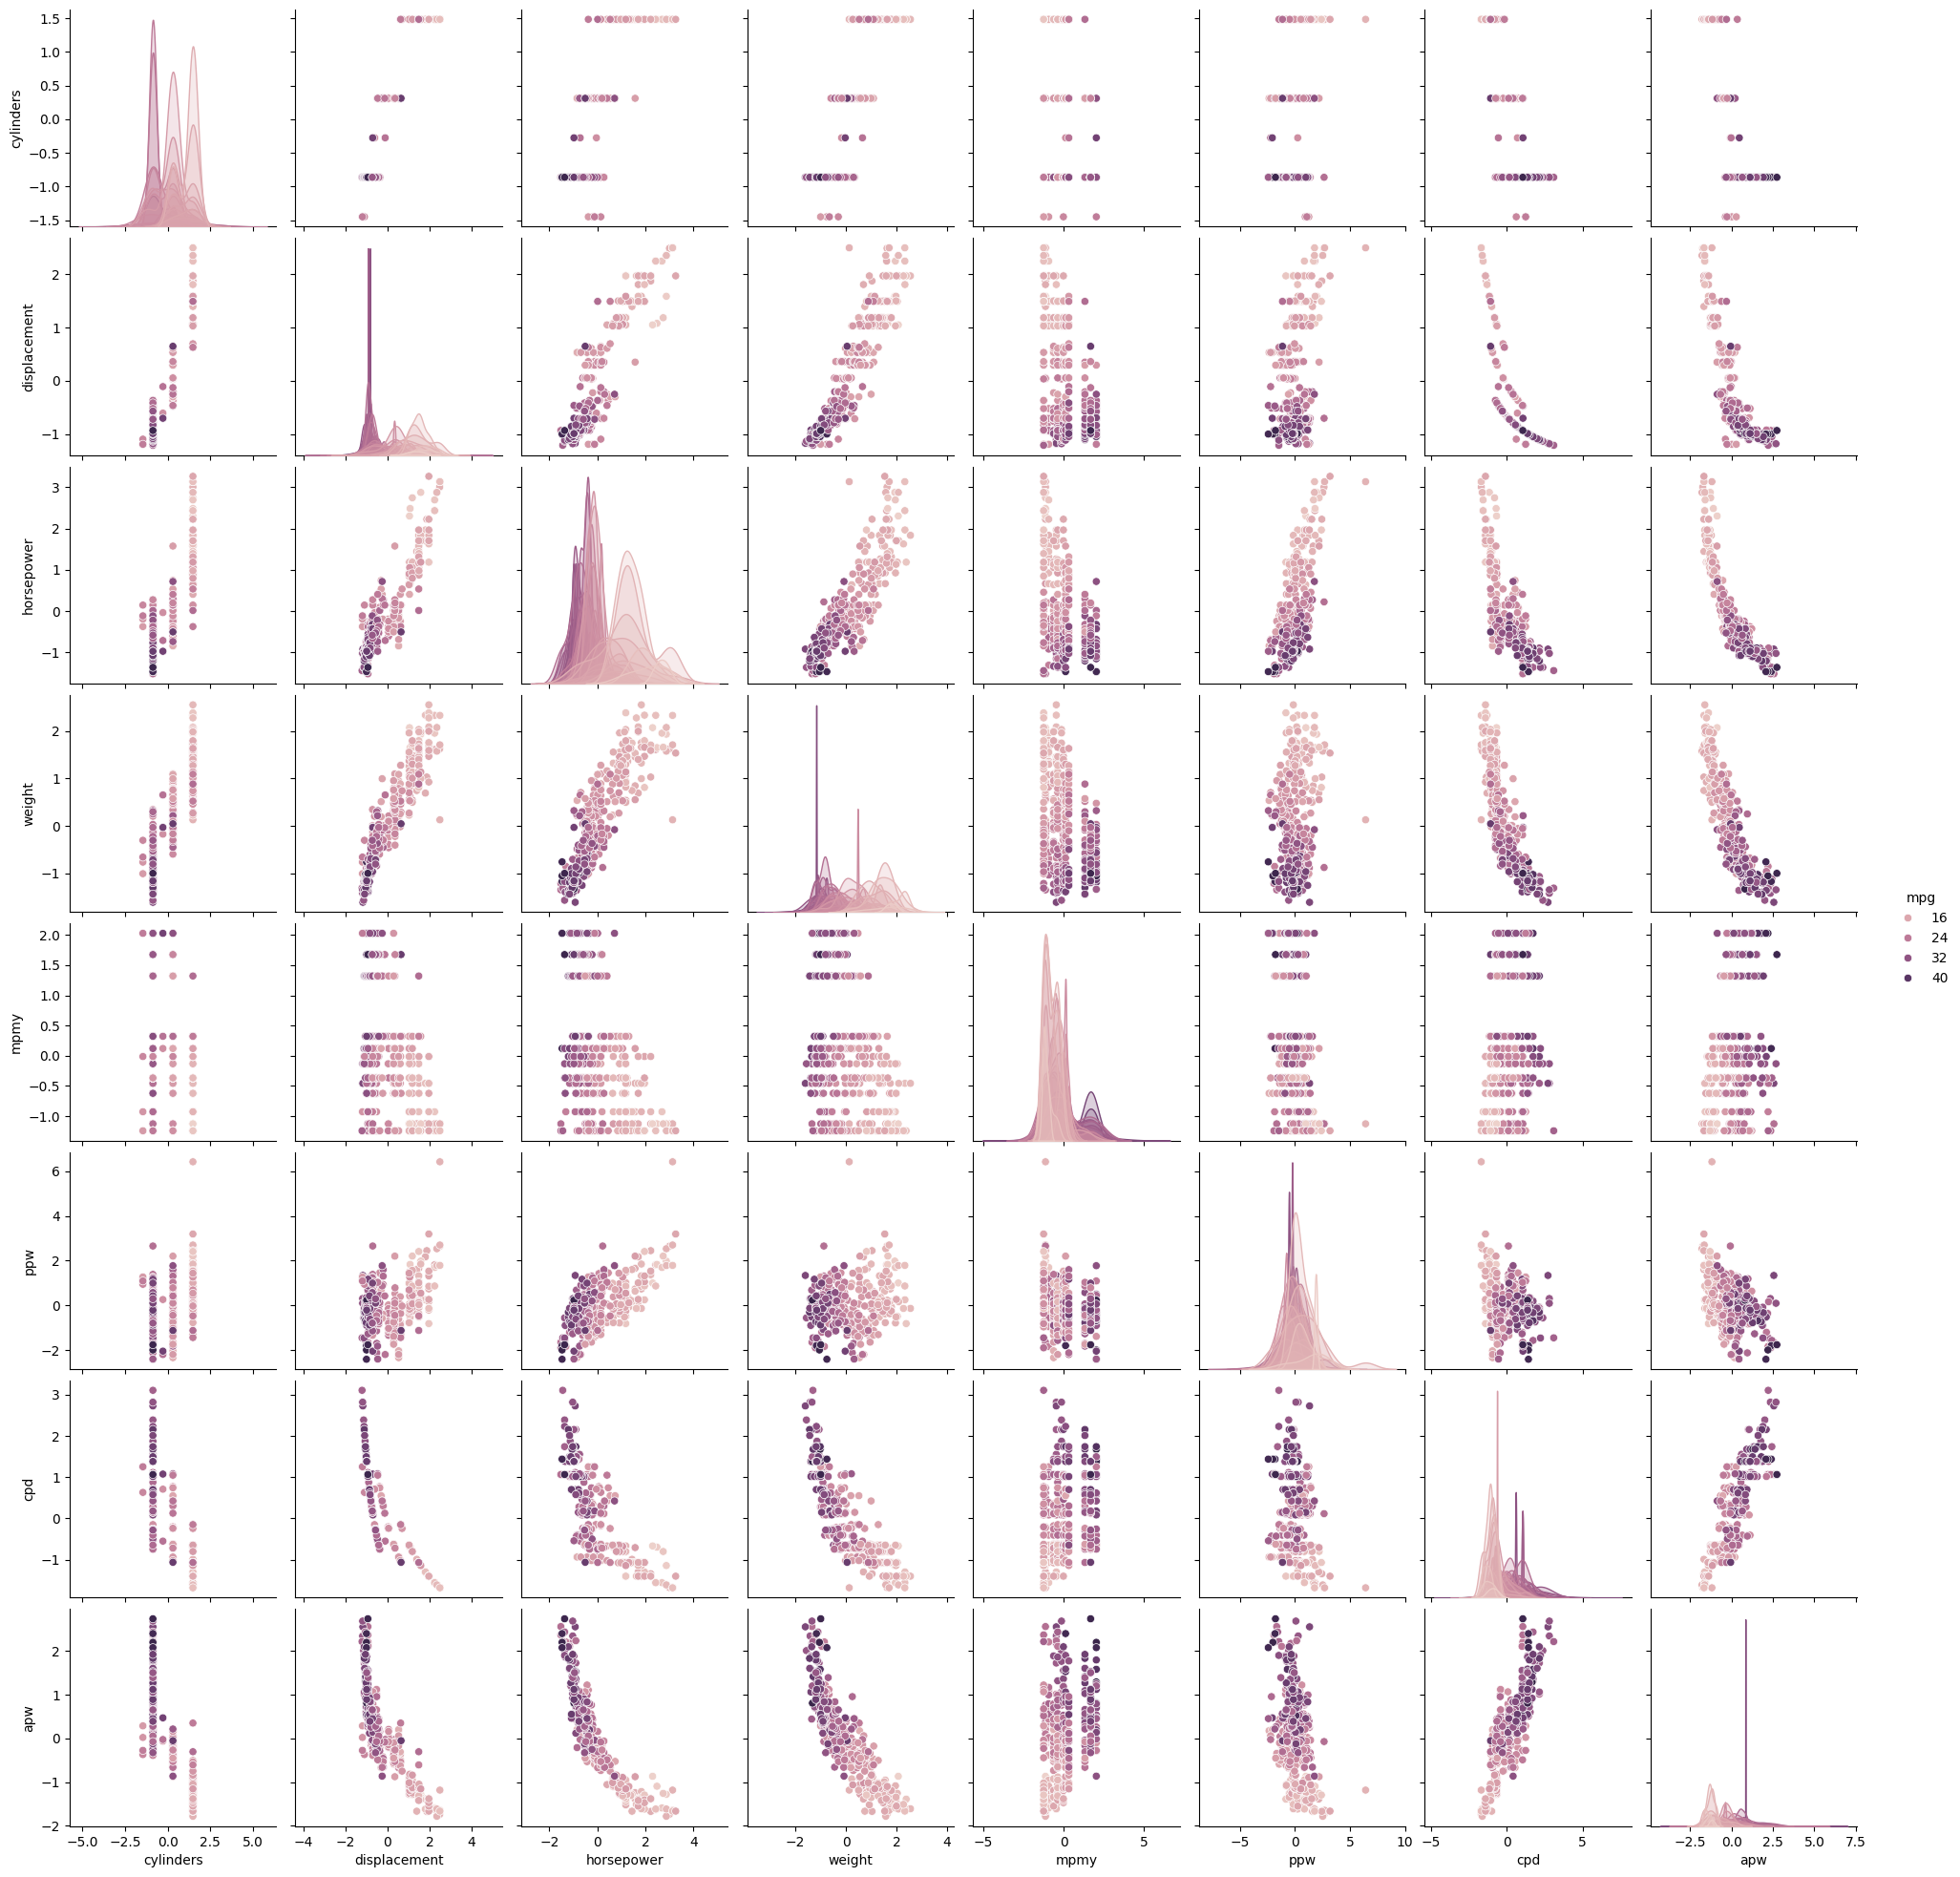

In [ ]:
import seaborn as sns
sns.pairplot(scaled_df, hue='mpg')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 7.86
Root Mean Squared Error: 2.8
R-squared: 0.85


In [ ]:
# 절편 확인
intercept = model.intercept_
print("Intercept:", intercept)

# 가중치 확인
coefficients = model.coef_
print("Coefficients:", coefficients)

Intercept: 23.49387989314601
Coefficients: [-3.17788282  4.83542065  2.22760727 -6.14052787  3.06752059 -1.84644168
  3.5776334  -0.45272859]


In [ ]:
print(y_pred, "\n", y_test)

[26.98128715 23.61310454 32.45187857 29.07456351 28.97220497 28.26843822
 13.25188057 28.99443207 19.11535838 34.18318946 14.44691642 22.27240094
 16.33259008 27.503517   20.8521864  30.76314693 21.4865268  31.7947951
 26.59156184 31.72609155 19.44581175 35.77254982 35.19286038 15.49320791
 33.13114269 24.15701991 21.0367109  18.57223116 28.20677846 23.25476682
 13.23835317 21.71661118 19.28317803 29.92860044 12.3837391  36.34590451
 13.01037844 26.02355393 12.2508518  10.36428646 13.48295491 30.14995728
 33.97793401 28.66927491 12.18840092 11.68504933 19.47456297 31.96771053
 21.75251784 30.20802705 14.9744943  23.15886124 23.42472684 31.3710662
 26.93619503 18.55279453 18.4627404  20.17894691 23.1098993  24.78114029
 11.15573014 20.6986998  23.99688754 22.18755926 24.7440792  25.69541347
 24.33730511 29.44972266 20.06706194 13.53097086 24.18555807 12.40798518
 24.96293813 25.87722228 24.48459597 26.11807715 13.02780552 15.06493701
 25.01650664] 
 78     26.0
274    21.6
246    36.1
5

In [ ]:
type(y_test)

pandas.core.series.Series